<div style="border:solid green 2px; padding: 20px">
<b>Родион, привет!</b>

Меня зовут Евгений Дащенко, и я буду проверять твой проект. Предлагаю общаться на «ты» 😊 Но если это не удобно - дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе стать аналитиком данных. Ты уже проделал большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b> Так выделены небольшие замечания. Одна-два таких замечания в проекте допустимы, но если их будет больше - тебе будет необходимо внести исправления. Это как тестовое задание при приеме на работу: очень много мелких ошибок могут стать причиной отказа кандидату. 

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b> Так я выделяю все остальные комментарии.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Описание данных**  
airports_nearest — расстояние до ближайшего аэропорта в метрах (м)  
balcony — число балконов  
ceiling_height — высота потолков (м)  
cityCenters_nearest — расстояние до центра города (м)  
days_exposition — сколько дней было размещено объявление (от публикации до снятия)  
first_day_exposition — дата публикации  
floor — этаж  
floors_total — всего этажей в доме  
is_apartment — апартаменты (булев тип)  
kitchen_area — площадь кухни в квадратных метрах (м²)  
last_price — цена на момент снятия с публикации  
living_area — жилая площадь в квадратных метрах(м²)  
locality_name — название населённого пункта  
open_plan — свободная планировка (булев тип)  
parks_around3000 — число парков в радиусе 3 км  
parks_nearest — расстояние до ближайшего парка (м)  
ponds_around3000 — число водоёмов в радиусе 3 км  
ponds_nearest — расстояние до ближайшего водоёма (м)  
rooms — число комнат  
studio — квартира-студия (булев тип)  
total_area — площадь квартиры в квадратных метрах (м²)  
total_images — число фотографий квартиры в объявлении  

Изучим общую информацию по данным, обработаем заполнив пропуски и исключив некорректные данные, добавим расчетные поля, изучим какие факторы больше всего влияют на стоимость квартиры, сравним влияние факторов во всей выборке и в срезе данных по центру Санкт-Петербурга


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, когда есть вступление в сам проект, каждый сможет быстрее разобраться с тем о чем сам проект. Можно также привести краткий план проведения самой работы и описание используемых столбцов. 

</div>

## Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [57]:
#загрузка библиотек
import pandas as pd
import matplotlib.pyplot as plt
#установим точность float 2 знака
pd.set_option("precision", 2)
#%%javascript 
#IPython.OutputArea.auto_scroll_threshold = 100;
#%config InlineBackend.figure_format = 'retina'

In [58]:
#откроем датасет
data = pd.read_csv('/datasets/real_estate_data.csv', sep="\t")
display(data.sample(10))
display(data.shape)
display(data.dtypes)
#посмотрим долю пустых значений в каждой колонке данных
gaps_in_the_data = (pd
                    .DataFrame({'percent_of_nulls':data.isna().sum()/len(data)})
                    .sort_values(by='percent_of_nulls', ascending=False)
                   )
gaps_in_the_data['percent_of_nulls'] = gaps_in_the_data['percent_of_nulls'].map(lambda x: '{:.2%}'.format(x))
display(gaps_in_the_data)
#посмотрим состав значений категоральных переменных
display(data['is_apartment'].value_counts())
display(data['locality_name'].value_counts())
#посмотрим диапазоны значений
display(data.describe())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1374,18,6.15e+06,70.2,2018-02-09T00:00:00,3,2.65,12.0,44.7,9,NaN,...,8.0,NaN,Санкт-Петербург,32586.0,11660.0,1.0,458.0,0.0,NaN,63.0
1698,4,2.20e+06,43.0,2016-12-03T00:00:00,1,2.75,3.0,19.0,3,NaN,...,8.6,NaN,деревня Вартемяги,NaN,NaN,NaN,NaN,NaN,NaN,362.0
10231,17,4.80e+06,43.0,2017-12-18T00:00:00,1,2.50,13.0,19.0,3,NaN,...,7.5,NaN,Санкт-Петербург,47754.0,15735.0,0.0,NaN,0.0,NaN,468.0
20694,11,1.28e+07,92.0,2015-11-09T00:00:00,3,2.60,16.0,53.4,15,NaN,...,13.0,0.0,Санкт-Петербург,14932.0,11348.0,1.0,36.0,1.0,274.0,612.0
11047,8,9.40e+06,83.0,2018-10-29T00:00:00,3,NaN,4.0,43.0,4,NaN,...,8.5,NaN,Санкт-Петербург,22595.0,3490.0,2.0,264.0,3.0,187.0,71.0
6850,15,3.35e+07,189.0,2019-01-25T00:00:00,5,3.00,14.0,78.0,7,NaN,...,19.0,1.0,Санкт-Петербург,28057.0,6996.0,2.0,514.0,1.0,842.0,NaN
17466,4,1.35e+07,95.0,2017-12-08T00:00:00,3,NaN,15.0,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,37715.0,12612.0,1.0,725.0,1.0,759.0,90.0
23532,7,8.20e+06,74.3,2019-03-13T00:00:00,2,NaN,24.0,36.0,11,NaN,...,11.5,NaN,Санкт-Петербург,20028.0,21740.0,0.0,NaN,1.0,400.0,NaN
15391,15,6.95e+06,43.6,2018-03-02T00:00:00,1,NaN,10.0,14.7,9,NaN,...,13.7,1.0,Санкт-Петербург,31744.0,4836.0,0.0,NaN,3.0,153.0,165.0
9616,9,2.65e+06,31.0,2018-10-01T00:00:00,1,2.50,5.0,18.0,5,NaN,...,5.0,1.0,Красное Село,24978.0,28403.0,0.0,NaN,0.0,NaN,28.0


(23699, 22)

total_images              int64
last_price              float64
total_area              float64
first_day_exposition     object
rooms                     int64
ceiling_height          float64
floors_total            float64
living_area             float64
floor                     int64
is_apartment             object
studio                     bool
open_plan                  bool
kitchen_area            float64
balcony                 float64
locality_name            object
airports_nearest        float64
cityCenters_nearest     float64
parks_around3000        float64
parks_nearest           float64
ponds_around3000        float64
ponds_nearest           float64
days_exposition         float64
dtype: object

,percent_of_nulls
is_apartment,88.29%
parks_nearest,65.91%
ponds_nearest,61.56%
balcony,48.61%
ceiling_height,38.80%
airports_nearest,23.38%
cityCenters_nearest,23.29%
ponds_around3000,23.28%
parks_around3000,23.28%
days_exposition,13.42%


False    2725
True       50
Name: is_apartment, dtype: int64

Санкт-Петербург          15721
посёлок Мурино             522
посёлок Шушары             440
Всеволожск                 398
Пушкин                     369
                         ...  
село Никольское              1
деревня Большой Сабск        1
деревня Хязельки             1
деревня Хапо-Ое              1
поселок Семиозерье           1
Name: locality_name, Length: 364, dtype: int64

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.00,2.37e+04,23699.00,23699.00,14504.00,23613.00,21796.00,23699.00,21421.00,12180.00,18157.00,18180.00,18181.00,8079.00,18181.00,9110.00,20518.00
mean,9.86,6.54e+06,60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,28793.67,14191.28,0.61,490.80,0.77,517.98,180.89
std,5.68,1.09e+07,35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,12630.88,8608.39,0.80,342.32,0.94,277.72,219.73
min,0.00,1.22e+04,12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,3.40e+06,40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,18585.00,9238.00,0.00,288.00,0.00,294.00,45.00
50%,9.00,4.65e+06,52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,26726.00,13098.50,0.00,455.00,1.00,502.00,95.00
75%,14.00,6.80e+06,69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,37273.00,16293.00,1.00,612.00,1.00,729.00,232.00
max,50.00,7.63e+08,900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,84869.00,65968.00,3.00,3190.00,3.00,1344.00,1580.00


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Если код не помещается в одну строку, рекомендую переносить его на следующую подстроку, с помощью обратного слеша. Так код читается быстрее и понятнее.
    
</div>

## Вывод

Загрузив данные и просмотрев структуру и примерный состав данных видно:  
### Типы данных  

first_day_exposition - тип данных object, хотя по составу данных это реквизит дата время. Потребуется преобразование в DateTime    
floors_total - по описанию целочисленные данные, но имеют тип float.Необходимо привидение типа.
is_apartment - Булев, а в загрузке object.Необходимо привидение типа.  
balcony - число балконов нужно преобразовать в целое  
parks_around3000 и ponds_around3000 - число парков и прудов - целоечисло. Необходимо привидение типа.  
days_exposition - число дней должно быть целое  

### Пустые значения и категоральные переменные
Реквизит is_apartment не содержит лишних данных. Так что возможно прямое преобразование в bool.  

Пустые значения в реквизитах: is_apartment, parks_nearest, ponds_nearest, balcony, airports_nearest, cityCenters_nearest, ponds_around3000, parks_around3000 скорее всего из-за того, что продавец просто не указал никаких данных. Пустые реквизиты, характеризующие сам факт наличия или отсутствия легко по логике заменяются на 0. С неуказанными расстояниями нужно подумать, то что данных нет не означает что расстояния тоже нет).  

Реквизит days_exposition необходимо заполнить расчетным значением от даты размещения

kitchen_area и living_area вероятно не восполнимые данные. Надо посмотреть можно ли заменить чем-то средним и в каких группах их считать чтобы было точнее

Пустое значение locality_name -таких данных 0.21%. Это очень мало. Скорее всего придется с этими данными расстаться, когда не понятно, где вообще эта квартира. Посмотрим на такие данные в срезе.  

### Некорректные значения

total_area - минимальное значение 12 м2. Максимальное 900 м2. Скорее всего выбросы. Рассмотрим подробнее.  
rooms - минимальное значение 0 - точно не корректные данные. Максимальное 19. Скорее всего выбросы. Рассмотрим подробнее. 
ceiling_height - высота потолка 100 метров. Слишком много).  
floors_total - 60 этажное здание в Питере. Не слышал про такое. Посмотрим "ближе".
kitchen_area - кухня 1.3 м2. Выбросы.  
airports_nearest - минимальное значение 0. Квартира в аэропорту)). Скорее всего продавец не заполнил.  
parks_nearest - минимальное значение 1м. жилье смежное с парком забор в забор. Интересно  
days_exposition - максимальное значение 4+лет. За это время и цены уже поменялись. Посмотрим "ближе".

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно детально изучили наши первичные данные, давай теперь их обработаем, ведь у нас есть план. 
</div>

## Шаг 2. Предобработка данных

In [59]:
#преобразуем типы данных first_day_exposition к дата время
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
#в floors_total есть пустые данные посмотрим на них
display(data[data['floors_total'].isna()].sample(5))
#ничего общего нет, оставим NA и преобразуем как есть
#в days_exposition есть пустые данные посмотрим на них
#ничего общего нет, заменим NA на 0 и преобразуем
display(data[data['days_exposition'].isna()].sample(5))
#заменим пропуск is_apartment на 0 и преобразуем
#заменим пропуск balcony на 0 и преобразуем
#заменим пропуск ponds_around3000 на 0 и преобразуем
#заменим пропуск ponds_around3000 на 0 и преобразуем
#для удобства приведем цену к целому. Не думаю что копейки играют роль
#
val_to_fill = {'is_apartment': 0, 'balcony': 0, 'parks_around3000': 0, 'ponds_around3000': 0, \
               'days_exposition':0, 'floors_total':0}
data = data.fillna(val_to_fill)
#
col_to_change = {'is_apartment': 'bool', 'balcony': 'bool', 'parks_around3000': 'int64', \
                 'ponds_around3000': 'int64', 'days_exposition':'int64', 'last_price':'int64', 'floors_total':'int64'}
data = data.astype(col_to_change)
#проверим типы. ничего ли не забыли
display(data.dtypes)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11328,10,5.39e+06,58.13,2018-10-10,3,NaN,NaN,31.00,9,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,135.0
10027,4,4.65e+06,67.50,2017-04-01,2,NaN,NaN,31.30,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,116.0
10351,4,5.38e+06,110.72,2015-10-09,4,NaN,NaN,80.39,4,NaN,...,NaN,0.0,поселок городского типа Токсово,NaN,NaN,NaN,NaN,NaN,NaN,251.0
11129,10,3.13e+06,34.53,2018-10-01,1,NaN,NaN,11.00,13,NaN,...,NaN,NaN,Санкт-Петербург,47303.0,25865.0,1.0,400.0,1.0,492.0,145.0
11389,3,4.70e+06,55.20,2016-06-23,1,NaN,NaN,18.39,7,NaN,...,15.37,0.0,Санкт-Петербург,35234.0,14674.0,0.0,NaN,1.0,844.0,15.0


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
6698,20,4.80e+06,47.0,2017-03-21,1,3.2,6.0,22.0,1,NaN,...,11.1,NaN,Санкт-Петербург,28129.0,7068.0,1.0,150.0,1.0,729.0,NaN
14676,5,6.26e+06,72.9,2018-10-13,3,NaN,9.0,NaN,1,NaN,...,NaN,NaN,Санкт-Петербург,36840.0,10672.0,1.0,446.0,0.0,NaN,NaN
20875,17,1.00e+07,102.4,2019-03-07,4,3.0,7.0,65.0,6,NaN,...,10.0,NaN,Санкт-Петербург,31584.0,3490.0,0.0,NaN,0.0,NaN,NaN
49,1,3.05e+06,30.8,2018-11-22,1,2.5,9.0,18.0,7,NaN,...,6.0,NaN,Санкт-Петербург,45341.0,16603.0,1.0,675.0,0.0,NaN,NaN
7992,10,6.30e+06,75.0,2018-12-03,3,2.6,9.0,45.0,7,NaN,...,10.0,NaN,Санкт-Петербург,13247.0,15838.0,0.0,NaN,0.0,NaN,NaN


total_images                     int64
last_price                       int64
total_area                     float64
first_day_exposition    datetime64[ns]
rooms                            int64
ceiling_height                 float64
floors_total                     int64
living_area                    float64
floor                            int64
is_apartment                      bool
studio                            bool
open_plan                         bool
kitchen_area                   float64
balcony                           bool
locality_name                   object
airports_nearest               float64
cityCenters_nearest            float64
parks_around3000                 int64
parks_nearest                  float64
ponds_around3000                 int64
ponds_nearest                  float64
days_exposition                  int64
dtype: object

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Здорово, что делаешь сцепку методов, чтобы лишний раз не переопределять переменные.
    

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

В том числе метод `fillna` и `astype` можно применять к нескольким столбцам одновременно.
    
Если столбцов более 2–ух, то рекомендую применять цикл `for`.
    
</div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>

Лучше всего не делать такие объемные ячейки, чтобы наш проект был более последовательным и его было проще изучать. 
    
</div>

### Шаг 3. Посчитайте и добавьте в таблицу

In [5]:
#посчитаем цену квадратного метра
data['price_per_square_meter'] = (data['last_price'] / data['total_area']).astype('int')

#создаю столбец дня недели
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

#создаю столбец месяца
data['month_exposition'] = data['first_day_exposition'].dt.month

#создаю столбец года
data['year_exposition'] = data['first_day_exposition'].dt.year

#добавим столбец соотношения жилой плозади к общей
data['living_to_total'] = data['living_area'] / data['total_area']

#добавим столбец отношения площади кухни к общей
data['kitchen_to_total'] = data['kitchen_area'] / data['total_area']

#категоризируем этаж квартиры
def floor_category(row):
    floor = row['floor']
    floor_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floor_total:
        return 'последний'
    else:
        return 'другой'

#этажей NA у нас нет, а вот total_floor есть 0.36%. Немного - попадут в другой
data['floor_category'] = data.apply(floor_category, axis=1)
#
display(data.sample(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
2309,10,4200000,62.4,2017-06-15,2,2.60,9.0,8.4,6,False,...,0,NaN,111,67307,3,6,2017,0.13,0.66,другой
15090,10,5880000,57.5,2017-12-18,3,2.55,10.0,38.9,3,False,...,0,NaN,479,102260,0,12,2017,0.68,0.11,другой
10307,5,6400000,52.2,2016-06-23,2,3.00,5.0,32.8,4,False,...,3,174.0,68,122605,3,6,2016,0.63,0.15,другой
8027,7,22000000,110.0,2017-01-20,3,2.70,25.0,NaN,21,False,...,0,NaN,324,200000,4,1,2017,NaN,0.13,другой
11998,16,2250000,31.9,2016-06-01,1,3.00,5.0,16.5,1,False,...,0,NaN,274,70532,2,6,2016,0.52,0.26,первый
20118,5,1300000,29.6,2017-02-21,1,NaN,5.0,17.2,3,False,...,0,NaN,123,43918,1,2,2017,0.58,0.17,другой
9990,11,3300000,36.0,2019-03-21,1,2.80,5.0,13.5,2,False,...,0,NaN,0,91666,3,3,2019,0.38,0.28,другой
1824,20,4475000,61.0,2018-02-26,2,NaN,7.0,35.0,4,False,...,0,NaN,284,73360,0,2,2018,0.57,0.16,другой
14385,5,8500000,78.0,2016-12-09,2,NaN,5.0,36.7,3,False,...,0,NaN,376,108974,4,12,2016,0.47,0.18,другой
21890,11,4650000,36.4,2017-12-11,1,2.80,17.0,18.0,3,False,...,0,NaN,72,127747,0,12,2017,0.49,0.27,другой


### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### 1. Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

,total_area,last_price,rooms,ceiling_height
count,23699.00,23699,23699.00,14504.00
mean,60.35,6541548,2.07,2.77
std,35.65,10887013,1.08,1.26
min,12.00,12190,0.00,1.00
25%,40.00,3400000,1.00,2.52
50%,52.00,4650000,2.00,2.65
75%,69.90,6800000,3.00,2.80
max,900.00,763000000,19.00,100.00


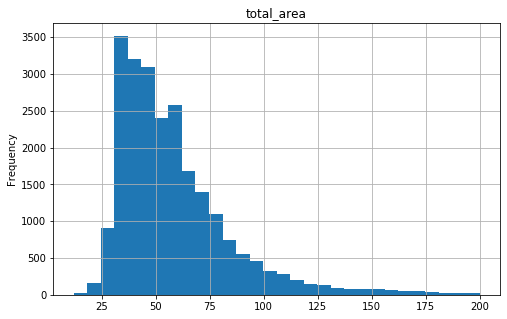

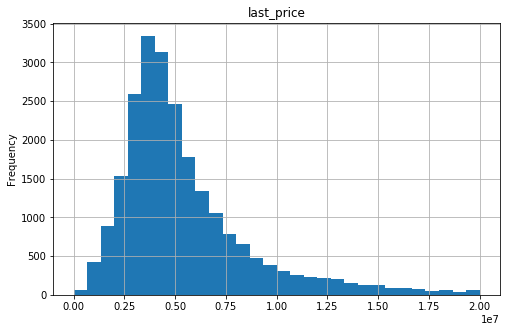

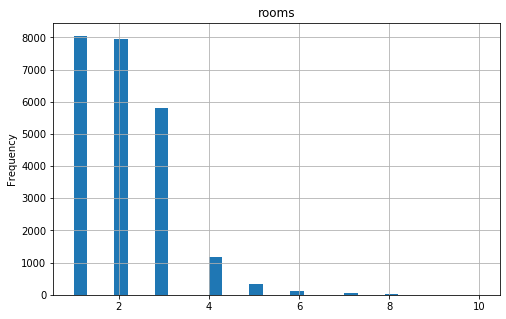

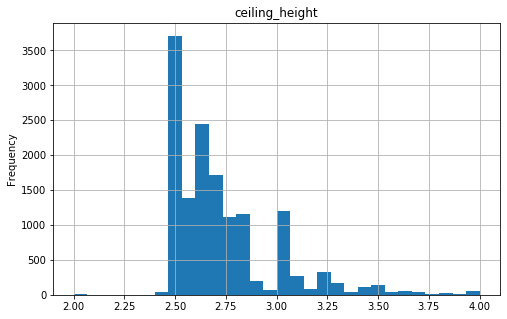

TypeError: boxplot() got an unexpected keyword argument 'figsize'

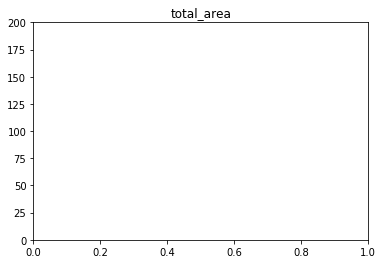

In [66]:
dt_desc = data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()
#для удобства восприятия
dt_desc['last_price'] = dt_desc['last_price'].astype('int')
display(dt_desc)
#
data['total_area'].plot(kind='hist', bins=30, title='total_area', grid=True, range=(12, 200), figsize=(8,5))
plt.show()
data['last_price'].plot(kind='hist', bins=30, title='last_price', grid=True, range=(0, 20000000), figsize=(8,5))
plt.show()
data['rooms'].plot(kind='hist', bins=30, title='rooms', grid=True, range=(1, 10), figsize=(8,5))
plt.show()
data['ceiling_height'].plot(kind='hist', bins=30, title='ceiling_height', grid=True, range=(2, 4), figsize=(8,5))
plt.show()
#построим диаграммы размаха, чтобы оценить выбросы
plt.ylim(0,200)
plt.title('total_area')
plt.boxplot(data['total_area'], showmeans =True, figsize=(8,5))
plt.show()
plt.title('last_price')
plt.ylim(0,15000000)
plt.boxplot(data['last_price'], showmeans =True, figsize=(8,5))
plt.show()
plt.title('rooms')
plt.ylim(0,8)
plt.boxplot(data['rooms'], showmeans =True, figsize=(8,5))
plt.show()
plt.title('ceiling_height')
plt.ylim(1,3.5)
data['ceiling_height'].plot(kind='box', title='ceiling_height', grid=True, figsize=(8,5))
plt.show()

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Обрати внимание, что наши действия повторяются с точки зрения построения графиков.
    
Это говорит о том, что мы можем создать функцию, которая будет выполнять все действия за нас.
    
Тем самым мы сможем оптимизировать свой код и проект целиком.
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Также мы можем увеличить сам график, чтобы его было удобнее изучать с помощью метода `plt.figure(figsize=(10,7)`
    
</div>

### Вывод:

Общая площадь квартир в предоставленных данных колеблется от 12 до 900 м2, среднее значение 60, а медиана 52 м2. Распределение данных Пуассона. Основные данные расположения между 40 и 70 м2. Выше 120 метров начинаются редкие значения.

Цены на недвижимость имеют среднее значение в 6,5 млн руб., медиана 4,6 млн руб. Такая большая разница скорее всего из-за выбросов максимальных сумм до 763млн. Основные значения расположения между 3,4 млн до 6,8 млн рублей. Выше 12 млн начинаются редкие значения. Распределение данных Пуассона.

Количество комнат колеблется от 1 до 19. Больше всего однокомнатных и двукомнатных квартир. Есть некорректные данные - 0 комнат. Редкие значения выше 6 комнат.

Высота потолков в среднем составляет 2,77 м, медиана 2,65 м. Распределение данных Пуассона. Есть данные ниже 2 метров. Скорее всего это некорректные данные, также как и 100 метров.

Во всех данных есть некорректные значения, напирмер 0 комнат, слишком низкая высоты потолков в 1 метр или слишком высокая 100 метров, а также цена квартиры в 12190 рублей. О данных неадекватных значениях и вероятности ихпроисхождения необходимо узнать о сотрудников источника данных, для общего изучения данных, мы не станем убирать эти значения.

#### 2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

,days_exposition
count,23699.00
mean,156.61
std,213.55
min,0.00
25%,22.00
50%,74.00
75%,199.00
max,1580.00


,days_exposition
count,23699.00
mean,156.61
std,213.55
min,0.00
20%,13.00
40%,50.00
50%,74.00
60%,109.00
80%,251.00
max,1580.00


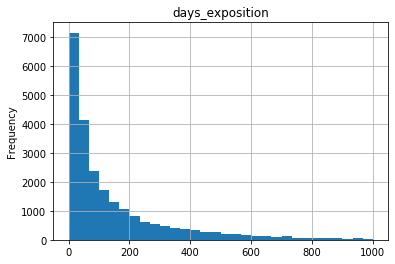

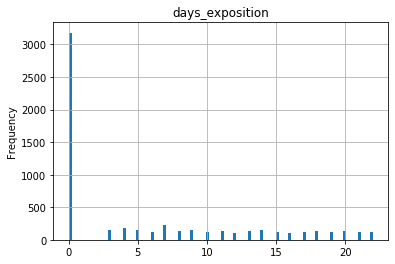

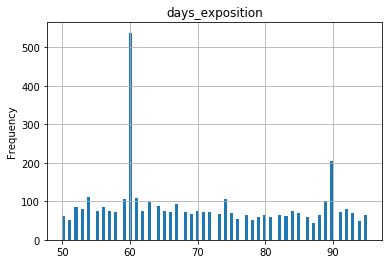

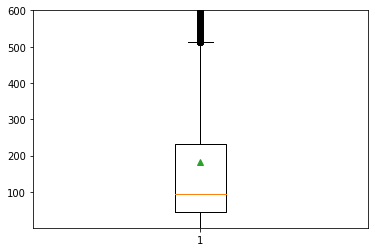

0     3181
45     880
60     538
7      234
30     208
90     204
4      176
3      158
5      152
14     148
Name: days_exposition, dtype: int64

1206    1
1318    1
1334    1
1350    1
1430    1
775     1
807     1
871     1
951     1
1175    1
Name: days_exposition, dtype: int64

In [7]:
display(data[['days_exposition']].describe())
#
display(data[['days_exposition']].describe(percentiles=[.2,.4,.6,0.8]))
#
data['days_exposition'].plot(kind='hist', bins=30, title='days_exposition', grid=True, range=(0, 1000))
plt.show()
data['days_exposition'].plot(kind='hist', bins=100, title='days_exposition', grid=True, range=(0, 22))
plt.show()
data['days_exposition'].plot(kind='hist', bins=100, title='days_exposition', grid=True, range=(50, 95))
plt.show()
#диаграмма размаха. Построим без нулевых дней, которые предсказуемо исказят результат
plt.ylim(1,600)
plt.boxplot(data[data['days_exposition']!=0]['days_exposition'], showmeans =True)
plt.show()
#посмотрим часто встречающиеся значения
display(data['days_exposition'].value_counts().head(10))
display(data['days_exposition'].value_counts().tail(10))

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>

<s>Давай постараемся автоматизировать построение графиков через цикл `for`. 
    
Почему это важно? 
    
- экономим своё время
- оптимизируем код
- делаем работу презентабельнее
    
Выбери любой участок кода где это сделать целесообразнее всего.

</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Полностью согласен. Там где повторяется рутина ниже применил функцию. В остальных случаях выше при построении подбираются параметры вручную после визуализации: bins, range, ylim.<br>for в таком случае не применим, да и функцию писать чтобы опять же передавать параметры туда смысла нет - мы заменим три строки plot на три строки вызова еще и функция.  
Все остальное даже рекомендации в зеленых ячейках я исправил)).</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Дело в том, что у каждого студента разный уровень подготовки и скорость освоения материала, и нам важно убедиться в том, что каждый разобрался с этим инструментом. 
    
В целом комментарии логичны, и если мы заменим грубо говоря на тоже самое то от этого не получим никакой выгоды. 

Тогда где же применима автоматизация в графиках ?
    
Например когда мы быстро хотим проверить распределение каждой переменной, не создавая функции, при построении графиков типа `subplots`, или же отображения несколько линий / гистограмм на одном графике.
    
В этих случаях для нас это будет полезно.
    
Будем тогда иметь в виду на будущее. 
    
</div>

### Выводы

Построив гистограммы мы видим Пуасоновское распределение дней размещения. Есть некорректные знаечния 0. Максимальный срок размещения 1580 дней, что тоже кажется некорректным. Среднее значение 157 дней, медиана - 74 дня - обычное время сколько занимает продажа.  
Рассмотрев данные мы видим скопления обьявлений на значениях 45, 60, 7, 30, 90 - это наиболее популярное количество дней до снятия объявления. С одной стороны может быть недвижимость действительно была такоеколичество дней в продаже. С другой возможны какие-то аномалии в данных на этих числах.  
Межквартильный размах - от 22 до 199 дней.  
От 500 дней судя по коробке с усами начинаются выбросы данных. На минимальных значениях выбросов нет, кроме некорректных нулевых значений.  
Итого необоснованно быстрых значений у нас нет, а необоснованно долгие - от 500 дней и выше. Нормальными считаются значения у  от 1 до 500 дней.

#### 3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили

130.0    22
125.0    21
121.0    19
150.0    18
170.0    16
160.0    16
135.0    15
134.0    15
145.0    15
128.0    13
123.0    10
122.0    10
140.0    10
136.0     9
190.0     9
Name: total_area, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
535,16,12500000,130.0,2017-11-17,5,3.00,7.0,82.0,5,False,...,0,NaN,90,96153,4,11,2017,0.63,0.07,другой
620,12,15800000,130.0,2019-04-04,5,NaN,5.0,83.0,2,False,...,1,225.0,0,121538,3,4,2019,0.64,0.11,другой
1895,12,9500000,130.0,2019-03-27,5,NaN,5.0,90.0,2,False,...,0,NaN,15,73076,2,3,2019,0.69,0.12,другой
2705,19,28570000,130.0,2017-10-02,4,NaN,4.0,92.8,2,False,...,3,60.0,501,219769,0,10,2017,0.71,0.10,другой
3563,20,12900000,130.0,2018-12-10,5,2.76,6.0,82.4,5,False,...,0,NaN,0,99230,0,12,2018,0.63,0.09,другой
4035,7,11900000,130.0,2017-05-03,5,NaN,2.0,84.2,1,False,...,2,710.0,95,91538,2,5,2017,0.65,0.08,первый
5359,11,15300000,130.0,2017-09-18,4,3.11,6.0,NaN,5,False,...,1,643.0,384,117692,0,9,2017,NaN,NaN,другой
6362,13,26000000,130.0,2017-09-27,3,3.18,6.0,69.5,1,False,...,0,NaN,177,200000,2,9,2017,0.53,0.21,первый
8010,20,27600000,130.0,2017-01-25,3,3.12,10.0,70.7,7,False,...,1,478.0,233,212307,2,1,2017,0.54,0.13,другой
8359,19,17000000,130.0,2018-02-24,4,NaN,12.0,NaN,5,False,...,0,NaN,56,130769,5,2,2018,NaN,NaN,другой


12500000    46
13500000    44
15000000    41
13000000    40
14000000    39
14500000    37
15500000    35
25000000    29
17000000    28
16000000    25
12900000    24
13900000    23
18000000    21
16500000    20
12700000    17
Name: last_price, dtype: int64

7     59
8     12
9      8
10     3
14     2
11     2
19     1
16     1
15     1
12     1
Name: rooms, dtype: int64

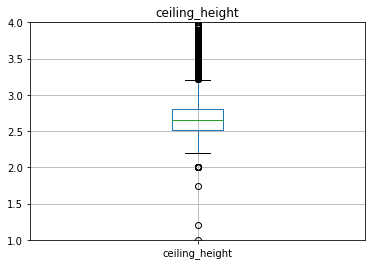

2.00    11
1.20     1
1.00     1
1.75     1
Name: ceiling_height, dtype: int64

27.0     8
25.0     7
32.0     2
22.6     1
10.3     1
100.0    1
27.5     1
20.0     1
14.0     1
26.0     1
24.0     1
Name: ceiling_height, dtype: int64

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
5712,5,1500000,42.8,2017-08-14,2,1.20,2.0,27.5,1,False,...,0,NaN,248,35046,0,8,2017,0.64,0.12,первый
16934,5,4100000,40.0,2017-10-17,1,1.75,37.0,17.4,5,False,...,3,80.0,71,102500,1,10,2017,0.43,0.21,другой
22590,16,6000000,55.0,2018-10-31,2,1.00,12.0,32.4,7,False,...,2,289.0,13,109090,2,10,2018,0.59,0.18,другой


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,floor_category
355,17,3600000,55.2,2018-07-12,2,25.0,5.0,32.0,2,False,...,0,NaN,259,65217,3,7,2018,0.58,NaN,другой
3148,14,2900000,75.0,2018-11-12,3,32.0,3.0,53.0,2,False,...,0,NaN,0,38666,0,11,2018,0.71,0.11,другой
4643,0,4300000,45.0,2018-02-01,2,25.0,9.0,30.0,2,False,...,1,331.0,181,95555,3,2,2018,0.67,0.16,другой
4876,7,3000000,25.0,2017-09-27,0,27.0,25.0,17.0,17,False,...,0,NaN,28,120000,2,9,2017,0.68,NaN,другой
5076,0,3850000,30.5,2018-10-03,1,24.0,5.0,19.5,1,True,...,1,578.0,7,126229,2,10,2018,0.64,0.18,первый
5246,0,2500000,54.0,2017-10-13,2,27.0,5.0,30.0,3,False,...,0,NaN,540,46296,4,10,2017,0.56,0.17,другой
5669,4,4400000,50.0,2017-08-08,2,26.0,9.0,21.3,3,False,...,0,NaN,267,88000,1,8,2017,0.43,0.14,другой
5807,17,8150000,80.0,2019-01-09,2,27.0,36.0,41.0,13,False,...,3,80.0,38,101875,2,1,2019,0.51,0.15,другой
6246,6,3300000,44.4,2019-03-25,2,25.0,5.0,31.3,5,False,...,2,73.0,0,74324,0,3,2019,0.70,0.13,последний
9379,5,3950000,42.0,2017-03-26,3,25.0,5.0,30.0,2,False,...,0,NaN,0,94047,6,3,2017,0.71,0.12,другой


,total_area,last_price,rooms,ceiling_height,days_exposition
count,10881.00,1.09e+04,10881.00,10881.00,10881.00
mean,60.86,6.62e+06,2.10,2.72,205.07
std,36.57,1.03e+07,1.07,0.29,235.07
min,12.00,1.22e+04,1.00,2.30,1.00
25%,40.60,3.55e+06,1.00,2.52,48.00
50%,52.00,4.75e+06,2.00,2.65,119.00
75%,70.00,6.80e+06,3.00,2.80,274.00
max,900.00,4.20e+08,16.00,8.30,1580.00


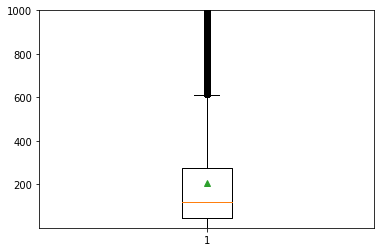

In [8]:
#рассмотрим аномалии по квартирам выше 120м2
display(data[data['total_area'] > 120]['total_area'].value_counts().head(15))
#детальнее посмотрим один срез
display(data[data['total_area'] == 130])
#рассмотрим аномалии по квартирам дороже 12 млн
display(data[data['last_price'] > 12000000]['last_price'].value_counts().head(15))
#рассмотрим аномалии по комнатам выше 6
display(data[data['rooms'] > 6]['rooms'].value_counts().head(15))
#рассмотрим аномалии повысоте потолков
plt.ylim(1,4)
data['ceiling_height'].plot(kind='box', title='ceiling_height', grid=True)
plt.show()
#
display(data[data['ceiling_height'] < 2.2]['ceiling_height'].value_counts().head(15))
display(data[data['ceiling_height'] > 10]['ceiling_height'].value_counts())
#рассмотрим аномалии по квартирам c потолком выше 10 метров
display(data[data['ceiling_height'] < 2])
display(data[data['ceiling_height'] > 10])
#
#отфильтруем данные от аномалий и запишем их в новый датафрейм good_data
good_data = data.query('(2 < ceiling_height < 10) and rooms != 0 and days_exposition != 45 and days_exposition != 60 and days_exposition != 7 and days_exposition != 30 and days_exposition != 90 and days_exposition != 0').copy()
#посмотрим как изменились среднии и медианы
display(good_data[['total_area', 'last_price', 'rooms', 'ceiling_height', 'days_exposition']].describe())
#посмтроим диаграмму размаха по дням размещения основываясь на очищенных данных
plt.ylim(1,1000)
plt.boxplot(good_data[good_data['days_exposition']!=0]['days_exposition'], showmeans =True)
plt.show()

### Выводы

Аномалии по общей площади не обнаружены. Выше 120 метров начинаются редковстречающиеся значения. Для примера рассмотрена недвижимость 130 м2 - чего-то общего и необычного не обнаружено.  
Аномалии по ценам не обнаружены.  
По количествам комнат выше 6 мы видим скопление данных на 7 и 8 комнатах.  
По высоте потолка данные ниже 2 метров отбросим - похоже на некорректные. Выше 10 метров похожи на неверное место разделителя. Нужно поделить на 10 или данных слишком мало- можно отбросить.  

После удаления выбросов изменились средняя и медиана дней размещения - 205 и 119 дней соответсвенно. Средние и медианные сроки размещения выросли. Нормальные значения теперь расположены между 1 и 600 днями.  



#### 4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена квадратного метра от общей площади квартиры, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года.

In [9]:
#гапишем функцию для построения диаграмм и сводной таблицы
def pvtable_plot(indata, x_series, y_lim=None, corplot=1):
    #изучим зависимость цена квадратного метра от x_series
    #построим диаграмму рассеяния по данным без обоработки
    indata.plot(x=x_series, y = 'price_per_square_meter', style = 'o', kind='scatter', alpha=0.4, ylim=y_lim)
    plt.title(x_series)
    plt.show()
    #построим диаграмму рассеяния по median внутри групп x_series
    pvtable = indata.pivot_table(index = x_series, values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
    pvtable.columns = ['mean', 'count', 'median']
    pvtable.sort_values('median', ascending = False)
    #display(pvtable.info())
    #display(pvtable)
    #plt.plot(pvtable['median'], pvtable.index.values)
    pvtable.plot(y = 'median', style = 'o', alpha=0.4)
    plt.title(x_series + '_median')
    plt.show()
    pvtable.plot(y = 'median')
    plt.title(x_series + '_median')
    plt.show()
    #выведем коэффициент корреляции x_series и price_per_square_meter
    if corplot == 1:
        print('К корреляции ', x_series, ':', indata[x_series].corr(indata['price_per_square_meter']))
    else:
        print('')
    #
    return pvtable

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Супер, а вот и функция для построения графиков 😊👍
    
</div>

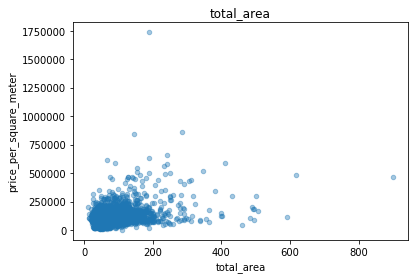

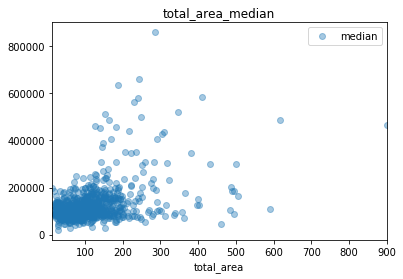

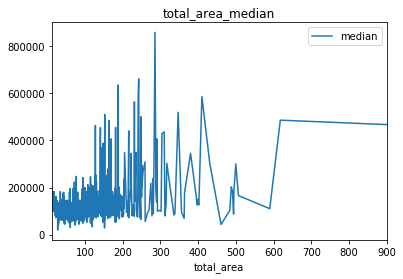

К корреляции  total_area : 0.3144309832437209


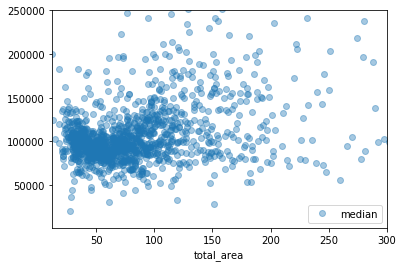

In [10]:
#изучим зависимость цена квадратного метра от общей площади квартиры
pvtable_total_area = pvtable_plot(good_data, 'total_area')
#укрупним для наглядности
pvtable_total_area.plot(y = 'median', style = 'o', alpha=0.4, xlim=(12,300), ylim=(1000,250000))
plt.show()

Коэффициент корреляции 0.31. Странно, но зависимость между площадью и ценой квадратного метра слабая.

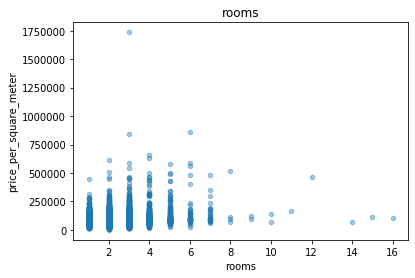

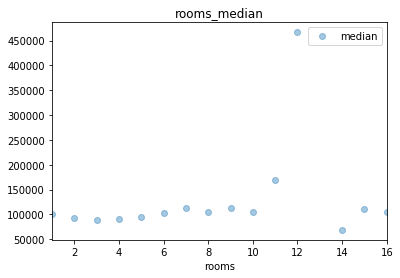

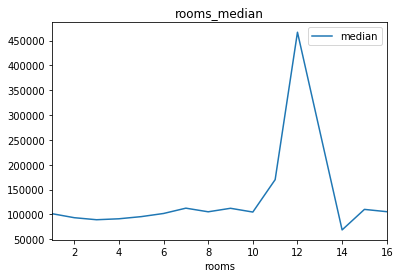

К корреляции  rooms : 0.060801399983907795


In [11]:
#изучим зависимость цена квадратного метра от числа комнат
pvtable_rooms = pvtable_plot(good_data, 'rooms')
#
#display(pvtable_total_area)

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Достаточно интересный способ автоматизации визуализации 😊
    
</div>

Диаграмма рассеяния по данным без обоработки не дает информации о зависимости цены от количества комнат. Мы видим столбы, что говорит о том, что большой разброс цен для одного и того же количества комнат.  
Построим по медианам групп.  

Мы видим нелинейную зависимость, так как сначала при росте комнат от 1 до 3 цена падает, а далее при росте комнат больше 3х - растет.  




-0.32265204298322697


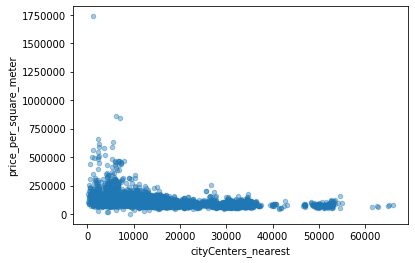

In [12]:
#изучим зависимость цена квадратного метра от удаленности от центра
good_data.plot(y = 'price_per_square_meter', x = 'cityCenters_nearest', kind = 'scatter', style = 'o', alpha = 0.4)

print(good_data['cityCenters_nearest'].corr(good_data['price_per_square_meter']))

Чем ближе к центру, тем больше стоимость. Это видно из графика и коэффициента корреляции -0.3

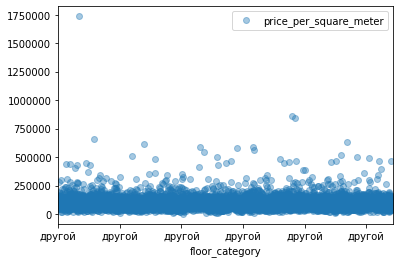

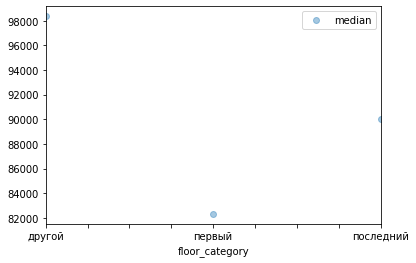

0.1469276254636101


,mean,count,median
floor_category,,,
другой,103906.31,8008,98360.0
первый,82745.49,1346,82321.5
последний,94977.50,1527,90000.0


In [15]:
#изучим зависимость цена квадратного метра от этажа Первого, последнего или другого
#построим диаграмму рассеяния по данным без обоработки
#pvtable_floor_category = pvtable_plot(good_data, 'floor_category', corplot=1)

good_data.plot(x='floor_category', y = 'price_per_square_meter', style = 'o', alpha=0.4)
plt.show()
#построим по медианам
pvtable_floor_category = good_data.pivot_table(index = 'floor_category', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pvtable_floor_category.columns = ['mean', 'count', 'median']
pvtable_floor_category.sort_values('median', ascending = False)
pvtable_floor_category.plot(y = 'median', style = 'o', alpha=0.4)
plt.show()
#корреляцию текста с числом не построишь. добавим столбец
corr_floorname_price = data.copy(deep=True)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('первый',0)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('последний',1)
corr_floorname_price['floor_category'] = corr_floorname_price['floor_category'].replace('другой',2)
print(corr_floorname_price['floor_category'].corr(corr_floorname_price['price_per_square_meter']))
#
display(pvtable_floor_category)

Кореляция 0.1. Непосредственно из графика видно что первые этажи стоят дешевле остальных, причем последние этажи, как крайние дешевле,чем остальные. Исходя из расчетов медианы квартиры на последнем этаже дороже квартир на первом этаже на 10%

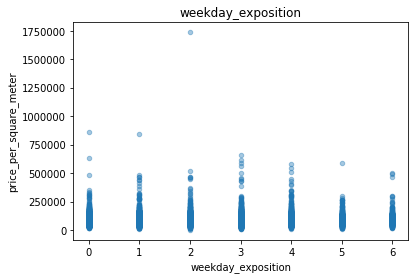

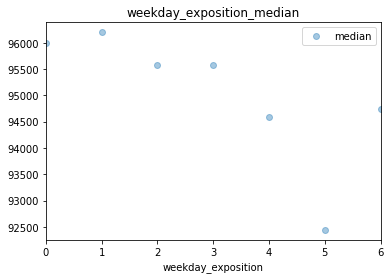

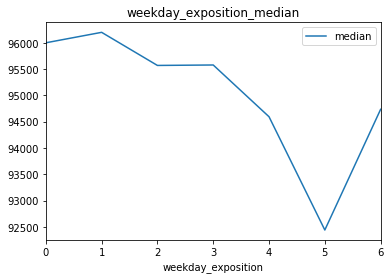

К корреляции  weekday_exposition : -0.012506196065864034


In [13]:
#изучим зависимость цена квадратного метра от дня недели
pvtable_weekday_exposition = pvtable_plot(good_data, 'weekday_exposition')

Корелляция очень слабая или имеется другой фактор. Визуально можно резюмировать, что во вторник самая высокая цена, затем к концу недели цена снижается. В субботу самая низкая.

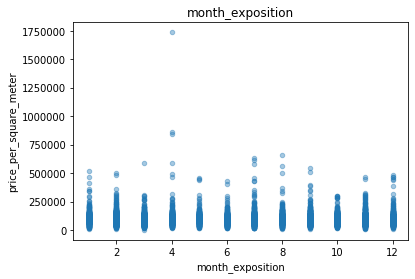

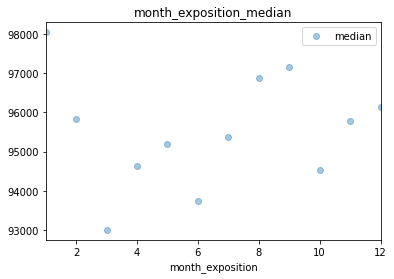

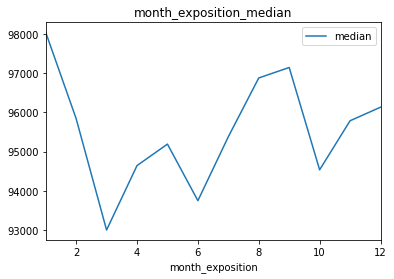

К корреляции  month_exposition : -0.0028911354424705073


In [14]:
#изучим зависимость цена квадратного метра от месяца
pvtable_month_exposition = pvtable_plot(good_data, 'month_exposition')

Самая высокая стоимость метра в январе, августе и сентябре! Самая низкая стоимость в марте и июне.  
На рынке недвижимости присутствует сезонность - в начале летом скорее всего в связи с отпусками спрос падает, поэтому мы видим наименьшие стоимости недвижимости.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    

В том числе можно было построить матрицу корреляции между нужными нам переменными.
    
И визуализировать её с помощью метода `heatmap` из библиотеки `seaborn`.
    
</div>

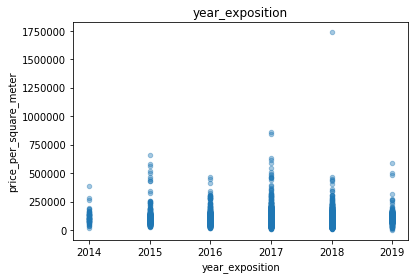

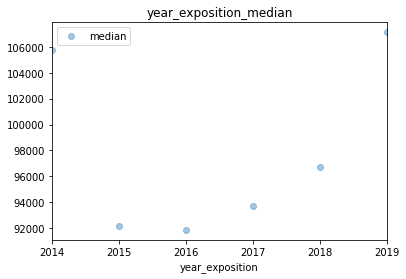

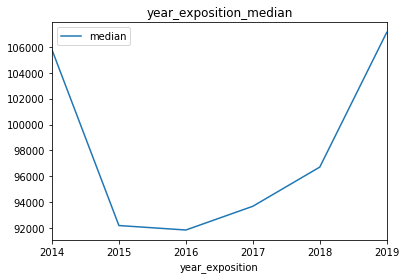

К корреляции  year_exposition : 0.001299027030158799


In [15]:
#изучим зависимость цена квадратного метра от года размещения
pvtable_year_exposition = pvtable_plot(good_data, 'year_exposition')

Видно, что с 2014 до 2016 года цена падала, но далше начала увеличиваться.  
Цены взяты в среднем по годам без учета сегментов рынка. Фактически разные сегменты могут себя вести во времени по разному.

### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья.

In [16]:
pvtable_locality_name = good_data.pivot_table(index = 'locality_name', values = 'price_per_square_meter', aggfunc = ['count', 'mean'])
pvtable_locality_name.columns = ['count', 'mean']
pvtable_locality_name = pvtable_locality_name.sort_values(['count','mean'], ascending = False).head(10)
#
display(pvtable_locality_name)
#
display(pvtable_locality_name['mean'].idxmax())
display(pvtable_locality_name['mean'].idxmin())


,count,mean
locality_name,,
Санкт-Петербург,7656,112821.12
Всеволожск,199,66473.69
посёлок Мурино,183,87015.72
посёлок Шушары,174,78000.79
Пушкин,173,102298.50
Колпино,154,75320.45
Петергоф,118,83883.86
Гатчина,108,68055.78
деревня Кудрово,107,90160.16


'Санкт-Петербург'

'Всеволожск'

Выбрали 10 населенных пунктов с максимальным числом обьявлений. Максимальная средняя цена в Санкт-Петербурге. Минимальная - во Всеволжске

### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

,price_per_square_meter
cityCenters_nearest_km,
0,154553.21
1,157549.22
2,144189.21
3,122016.38
4,135746.34
5,143789.59
6,145203.91
7,138579.34
8,120352.29


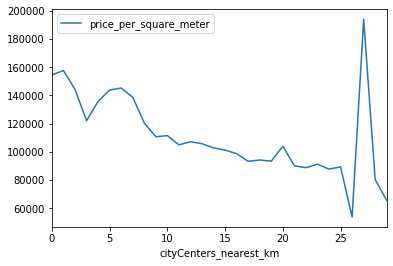

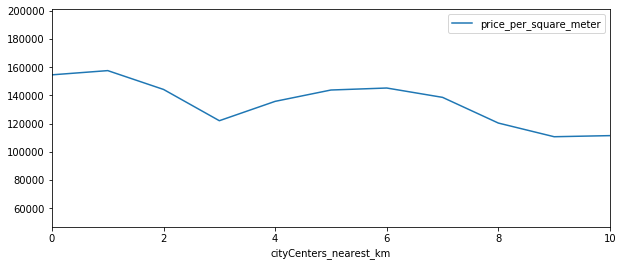

In [17]:
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest']/1000
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].fillna(99999)
good_data['cityCenters_nearest_km'] = good_data['cityCenters_nearest_km'].astype('int64')
#
pvtable_cityCenters_km = good_data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest_km !=99999').pivot_table(index='cityCenters_nearest_km', values='price_per_square_meter', aggfunc='mean')
display(pvtable_cityCenters_km)
#
pvtable_cityCenters_km.plot(y = 'price_per_square_meter', kind='line')
plt.show()
pvtable_cityCenters_km.plot(y = 'price_per_square_meter', kind='line', xlim=(0,10), figsize=(10,4))
plt.show()

### Опираясь на график центром будем считать расстояние до 3 км

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Ориентировочно это 8–10 км, потому что дальше идёт в том числе спад и длительная стагнация стоимости.
    
</div>

### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

In [18]:
#получим срез недвижимости в центре
data_centre = good_data.query('cityCenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')
#display(data_centre)
display(data_centre.describe())
#изучим зависимость цена квадратного метра от площади
#display(pvtable_plot(data_centre, 'total_area'))

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,airports_nearest,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,living_to_total,kitchen_to_total,cityCenters_nearest_km
count,577.00,5.77e+02,577.00,577.00,577.00,577.00,560.00,577.00,548.00,577.00,...,577.00,498.00,577.00,5.77e+02,577.00,577.00,577.00,560.00,548.00,577.00
mean,10.52,1.49e+07,97.53,3.11,3.20,5.09,60.39,3.19,14.39,22542.34,...,1.83,375.07,293.36,1.39e+05,2.46,6.57,2016.97,0.61,0.16,2.05
std,6.34,2.27e+07,54.06,1.42,0.37,1.36,37.16,1.56,8.94,2214.28,...,1.11,271.99,300.49,1.04e+05,1.63,3.52,1.05,0.10,0.08,0.96
min,0.00,2.40e+06,12.00,1.00,2.45,2.00,10.00,1.00,3.50,17863.00,...,0.00,22.00,3.00,2.89e+04,0.00,1.00,2014.00,0.21,0.03,0.00
25%,6.00,6.95e+06,63.00,2.00,3.00,4.00,36.00,2.00,9.00,21060.00,...,1.00,134.00,76.00,9.41e+04,1.00,3.00,2016.00,0.55,0.11,1.00
50%,10.00,9.40e+06,84.20,3.00,3.20,5.00,51.35,3.00,12.00,22430.00,...,2.00,315.00,183.00,1.13e+05,3.00,7.00,2017.00,0.62,0.14,2.00
75%,15.00,1.38e+07,115.00,4.00,3.40,6.00,72.00,4.00,16.52,23832.00,...,3.00,579.00,436.00,1.46e+05,4.00,10.00,2018.00,0.68,0.19,3.00
max,50.00,3.30e+08,483.90,11.00,5.30,14.00,312.50,13.00,77.00,31773.00,...,3.00,1077.00,1477.00,1.74e+06,6.00,12.00,2019.00,0.89,0.56,3.00


Площадь в центре в среднем в пределах 63-120 м2. Число комнат варьируется в полном диапазоне. Высота потолков обычно от 3 до 3.5 м, видимо однотипные постройки. Цена 6.95- 138 млн.

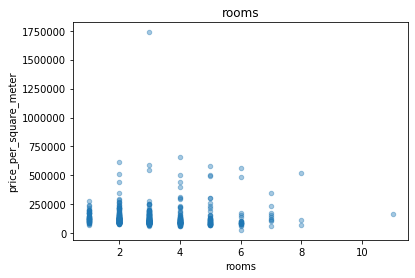

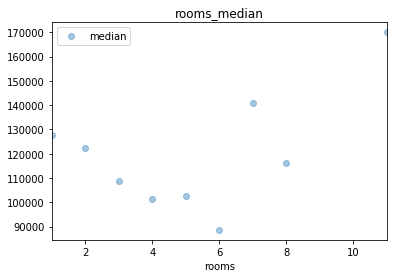

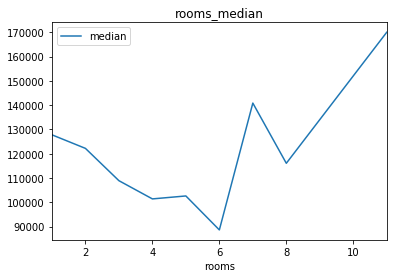

К корреляции  rooms : 0.013084655326169767


,mean,count,median
rooms,,,
1,141567.28,53,127777.0
2,142001.31,158,122193.5
3,135380.09,179,108892.0
4,131394.62,99,101388.0
5,142097.92,53,102604.0
6,134685.41,22,88618.5
7,162289.44,9,140845.0
8,236085.33,3,116056.0
11,170015.00,1,170015.0


In [19]:
#изучим зависимость цена квадратного метра от количества комнат
pvtable_plot(data_centre, 'rooms')

Коэффициент корреляции мизерный. Говорить о зависимости цены кв метра от числа комнат не приходится. Присутствует другой фактор.  
На графике видно тем не менее, что цена прии росте общего числа комнат до 6 снижается, затем растет. Причем делает это более резко, чем на общей выборке.

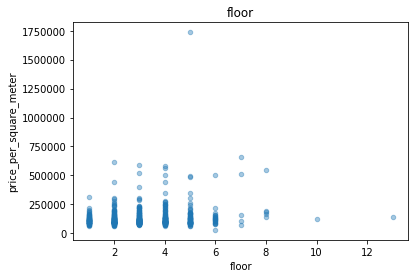

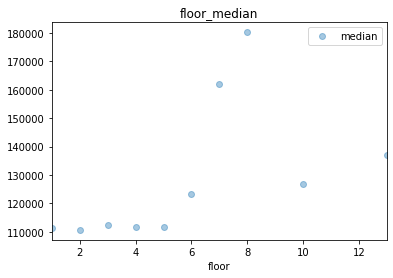

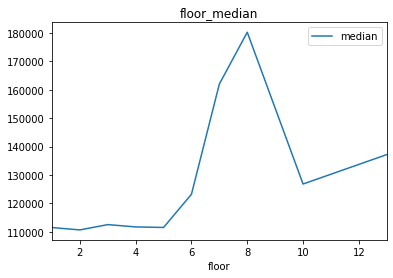

К корреляции  floor : 0.14063944055882008


,mean,count,median
floor,,,
1,118864.95,78,111491.5
2,130947.44,131,110650.0
3,134868.00,140,112518.0
4,141327.95,118,111707.0
5,157999.33,75,111510.0
6,138055.83,23,123203.0
7,302031.60,5,162015.0
8,246071.20,5,180241.0
10,126808.00,1,126808.0


In [20]:
#изучим зависимость цена квадратного метра от этажа
pvtable_plot(data_centre, 'floor')

Квартиры в среднем дешевле на первом этаже, чем на высоких этажах. Также как и в общей выборке.

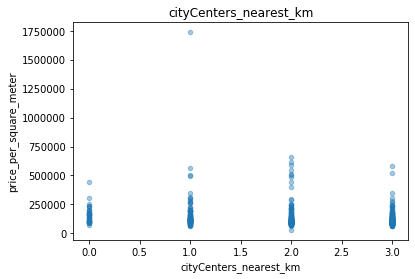

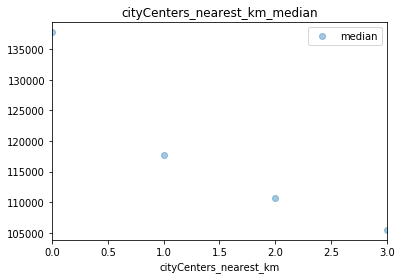

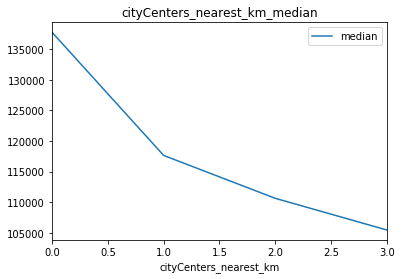

К корреляции  cityCenters_nearest_km : -0.13362453390646706


,mean,count,median
cityCenters_nearest_km,,,
0,154553.21,43,137755
1,157549.22,125,117647
2,144189.21,170,110644
3,122016.38,239,105468


In [21]:
#изучим зависимость цена квадратного метра от расстояния до центра
pvtable_plot(data_centre, 'cityCenters_nearest_km')


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Кстати можно было бы сравнить центр и весь город в целом, для наглядности наших расчетов.
    
</div>

Зависимость обратная и при удалении от центра цена падает.

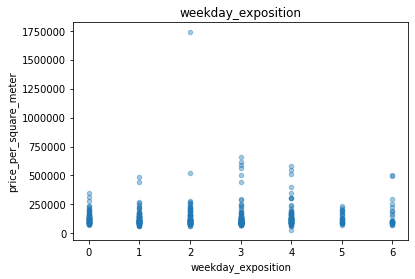

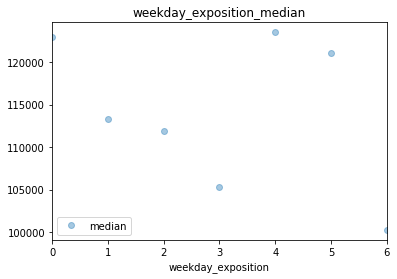

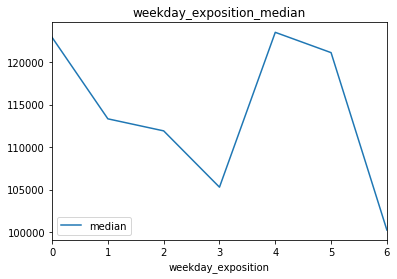

К корреляции  weekday_exposition : 0.040699749741275625


,mean,count,median
weekday_exposition,,,
0,133687.40,82,122934.5
1,128848.32,103,113333.0
2,148892.39,98,111914.0
3,133933.35,140,105277.5
4,146874.14,99,123529.0
5,134624.11,27,121136.0
6,152223.71,28,100228.0


In [22]:
#изучим зависимость цена квадратного метра от дня недели размещения
pvtable_plot(data_centre, 'weekday_exposition')

Корелляция очень слабая или имеется другой фактор. Визуально можно резюмировать, что ситуация отличается от обще выборки.  
В понедельник и пятницу самая высокая цена. Цена снижается от пн к чт. В воскресенье самая низкая.

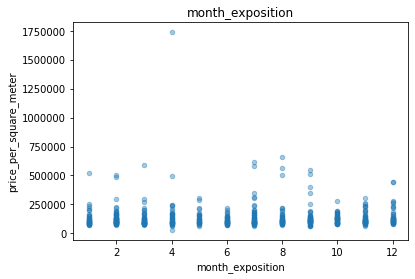

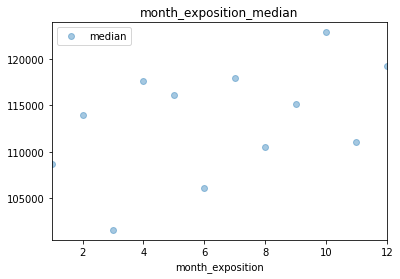

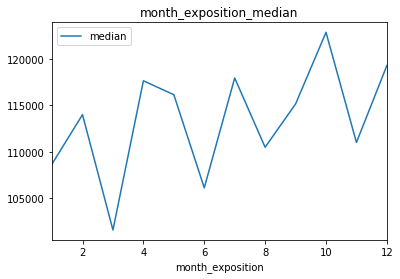

К корреляции  month_exposition : 0.0028293921184245553


,mean,count,median
month_exposition,,,
1,131199.76,41,108695.0
2,135268.28,67,114000.0
3,129052.19,52,101578.5
4,177814.56,39,117647.0
5,134569.21,29,116150.0
6,115060.15,41,106122.0
7,150418.73,55,117948.0
8,149580.89,46,110491.0
9,140646.09,57,115151.0


In [23]:
#изучим зависимость цена квадратного метра от месяца размещения
pvtable_plot(data_centre, 'month_exposition')

Ситуация опять же отличается от общей выборки по максимальным ценам. Самая высокая стоимость метра в октбре и декабре.  
По минимальным схожая. Самая низкая стоимость в марте и июне!  
На рынке недвижимости присутствует сезонность в начале квартала цена меньше чем в конце. В середние квартал пик.  
В целом цена в течении года растет.  


<div class="alert alert-success">
<b>Комментарий ревьюера (2):</b>

Отлично 👍
    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Отличные и логичные промежуточные комментарии 👍      

</div>

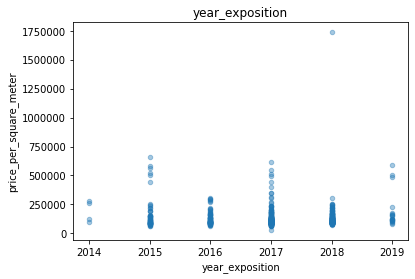

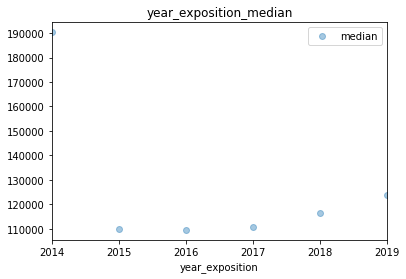

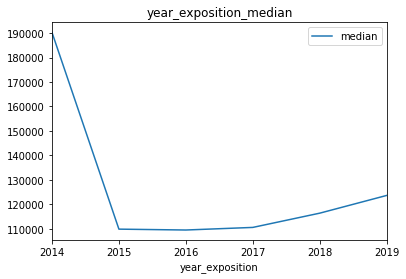

К корреляции  year_exposition : -0.009251464356014032


,mean,count,median
year_exposition,,,
2014,188353.25,4,190289.0
2015,157998.16,67,109900.0
2016,130237.52,84,109545.0
2017,131582.53,230,110607.0
2018,137489.68,172,116431.5
2019,191103.70,20,123675.0


In [24]:
#изучим зависимость цена квадратного метра от года размещения
pvtable_plot(data_centre, 'year_exposition')

Видно, что с 2014 до 2015 года цена падала. Затем три года сохранядась примерно на одном уровне. А затем начала расти.  
Такое поведение цены в центре отличается от поведения цены в целом по рынку СПБ.  

### Шаг 5. Общий вывод

Мы рассмотрели и обработали полученные данные. Заменили типы данных на логичные и удобные для дальнейшей работы и анализа. Заполнили пропущенные значения там, где это было необходимо.
Дополнили данные расчетными величинами: ценой квадратного метра жилья, дни недели, месяцы и года из даты размещения объявлений, добавили категории по этажам квартир. 
Изучили параметры на наличие аномальных значений. Были определены аномалии в высоте потолка и сроках размещения. Отброшены некорректные значения.
Мы выявили при помощи диаграммы размаха, что необоснованно долгие продажи- от 500 дней и выше. Нормальными считаются значения у от 1 до 500 дней. 
Выявлено, что на стоимость квадратного метра недвижимости больше всего влияют количество комнат, этаж квартиры, удаленность от центра, месяц и год размещения.
Незначительно на стоимость квадратного метра влияют день размещения и общая площадь.
Опираясь на график изменения цен в зависимости от удаления от центра СПБ, мы выявили центр города в радиусе 3 километров.
Видно, что с 2014 до 2016 года цена падала, но дальше начала увеличиваться. В центре цена вела себя немного иначе. Видно, что с 2014 до 2015 года цена падала. Затем три года сохранядась примерно на одном уровне. Что необычно для рынка СПБ в целом.
Цены взяты в среднем по годам без учета сегментов рынка. Фактически разные сегменты могут себя вести во времени по разному.

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>

Выводы понятны и логичны, а самое главное подкреплены выявленными фактами.
    
Достаточно детально проделанная работа и это не может не радовать 😊
    
Давай поправим мои комментарии и будем двигаться дальше.
    
Если у тебя вдруг есть какие–либо вопросы, то я с радостью отвечу на них 😊
       

</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>
    
Здорово, что получилось поправить мои комментарии, и сделали это достаточно оперативно. Думаю мы научились дополнительным инструментам и это же классно 😊
        
Поздравляю с успешным завершением проекта 😊👍
    
И желаю успехов в новых работах 😊

    
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера (общий):</b>

Рекомендую посмотреть на дополнительную стилизацию ячеек типа **markdown**.
    
**Жирный**
*Курсив*
    
--- 

# Заголовок первого уровня

--- 
    
## Заголовок второго уровня
  
---  
Списки:
    
- один 
- два
- три
   
---
    
1. Раз
2. Раз раз
3. Раз два три
    
--- 
    
Отображение `переменных`
    
    
    
</div>

### Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод info())
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  посчитано и добавлено в таблицу: цена квадратного метра
- [x]  посчитано и добавлено в таблицу: день недели, месяц и год публикации объявления
- [x]  посчитано и добавлено в таблицу: этаж квартиры; варианты — первый, последний, другой
- [x]  посчитано и добавлено в таблицу: соотношение жилой и общей площади, а также отношение площади кухни к общей
- [x]  изучены следующие параметры: площадь, цена, число комнат, высота потолков
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?"
- [x]  выполнено задание: "Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили."
- [x]  выполнено задание: "Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучите зависимость от даты размещения: дня недели, месяца и года. "Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "
- [x]  выполнено задание: "Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (*'locality_name'*). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона. "
- [x]  выполнено задание: "Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?"
- [x]  в каждом этапе есть выводы
- [x]  есть общий вывод